# SO MANY TS DIAGRAMS

the adventures of whether or not they'll be an obvious way to discern my water masses

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean as cm
from scipy.interpolate import interpn
import scipy.interpolate as interp

In [2]:
mymesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
depthf = interp.interp1d(mymesh.z, mymesh.gdept_1d)

In [3]:
def get_data(mydata, starttime, endtime):
    salt = mydata.init_salt[(mydata.init_t >= starttime) & (mydata.init_t <= endtime)]
    temp = mydata.init_temp[(mydata.init_t >= starttime) & (mydata.init_t <= endtime)]
    depth = depthf(mydata.init_z[(mydata.init_t >= starttime) & (mydata.init_t <= endtime)]-1.)[0]
    return salt, temp, depth

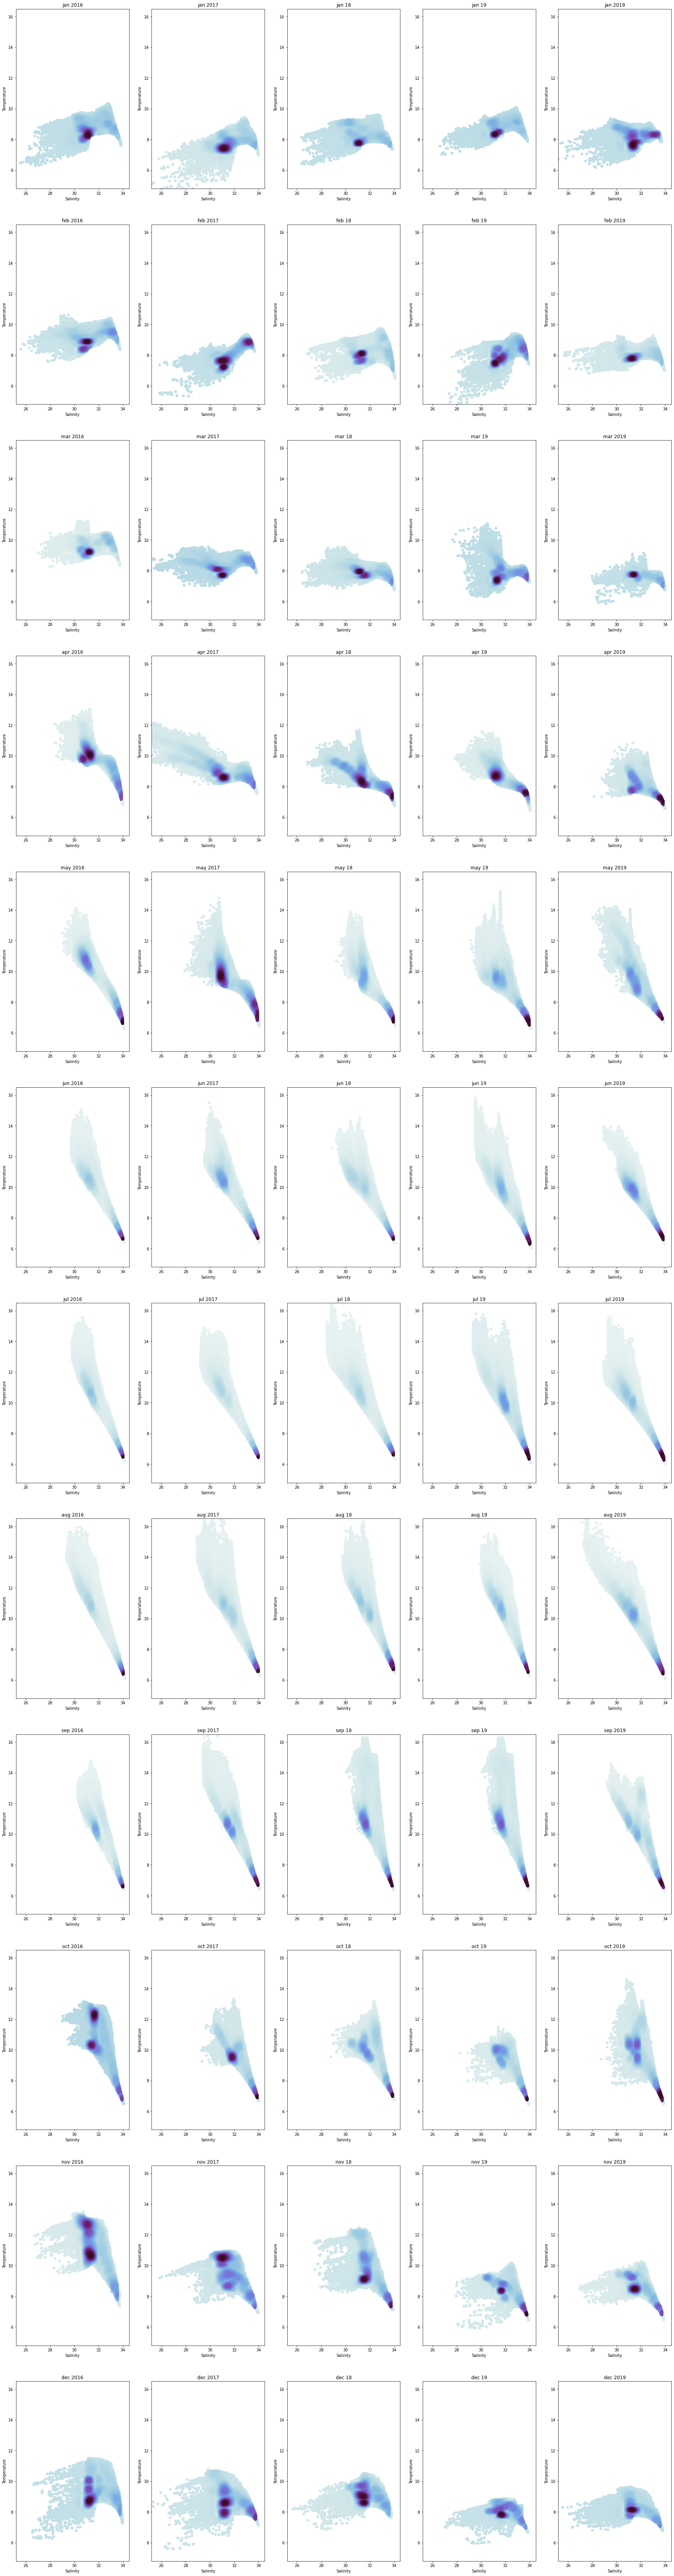

In [4]:
fig, ax = plt.subplots(12,5, figsize=(30,120))

yearjumps = [0,1,-2,1,0,1,0,1,1,0,1,0]
str_mo = ['jan', 'feb', 'mar', 'apr','may', 'jun', 'jul', 'aug', 'sep','oct', 'nov', 'dec']
starttime = 1
endtime = 720

#2016 and 2017
year = [16,17]

l = -1
for num in year:
    file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/1yr_runs/201905_1hr/forward_01jan'+str(num)+'/ariane_positions_quantitative.nc'
    mydata = xr.open_dataset(file)
    k=0
    l+=1
    for i in range(12):
        salt, temp, _ = get_data(mydata, starttime+(i*720+(sum(yearjumps[:i+1]*24))), endtime+(i*720+(sum(yearjumps[:i+1]*24))))
        
        #would like to get the denisty of points
        data , x_e, y_e = np.histogram2d(salt,temp, bins = 20, density = True )
        z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ), data ,np.vstack([salt,temp]).T ,method = "splinef2d", bounds_error = False)
        z[np.where(np.isnan(z))] = 0.0

        # Sort the points by density, so that the densest points are plotted last
        idx = z.argsort()
        salt, temp, z = salt[idx], temp[idx], z[idx]
                    
        ax[k,l].scatter(salt,temp, c=z, cmap=cm.cm.dense)
        title = str_mo[i] + " 20" + str(num)
        ax[k,l].set_title(title)
        ax[k,l].set_ylabel('Temperature')
        ax[k,l].set_xlabel('Salinity')
        ax[k,l].set_ylim([4.8, 16.5])
        ax[k,l].set_xlim([25.2, 34.5])
        k+=1

#2019 and 2018 (both done month by month)
year = [18,19]
l=1
k=0
for num in year:
    l+=1
    k=0
    for i in range(len(str_mo)):
        file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_1hr/forward_01'+str_mo[i]+str(num)+'/ariane_positions_quantitative.nc'
        mydata = xr.open_dataset(file)
        
        salt = mydata.init_salt
        temp = mydata.init_temp
        
        data , x_e, y_e = np.histogram2d(salt,temp, bins = 20, density = True )
        z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ), data ,np.vstack([salt,temp]).T ,method = "splinef2d", bounds_error = False)
        z[np.where(np.isnan(z))] = 0.0
        idx = z.argsort()
        salt, temp, z = salt[idx], temp[idx], z[idx]
        
        ax[k,l].scatter(salt,temp, c=z, cmap=cm.cm.dense)
        title = str_mo[i] + " " + str(num)
        ax[k,l].set_title(title)
        ax[k,l].set_ylabel('Temperature')
        ax[k,l].set_xlabel('Salinity')
        ax[k,l].set_ylim([4.8, 16.5])
        ax[k,l].set_xlim([25.2, 34.5])
        k+=1
            

#2020
file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/1yr_runs/201905_1hr/forward_01jan20/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)

l=4
k=0
for i in range(12):
        salt, temp, _ = get_data(mydata, starttime+(i*720+(sum(yearjumps[:i+1]*24))), endtime+(i*720+(sum(yearjumps[:i+1]*24))))
        
        data , x_e, y_e = np.histogram2d(salt,temp, bins = 20, density = True )
        z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ), data ,np.vstack([salt,temp]).T ,method = "splinef2d", bounds_error = False)
        z[np.where(np.isnan(z))] = 0.0

        idx = z.argsort()
        salt, temp, z = salt[idx], temp[idx], z[idx]
                    
        ax[k,l].scatter(salt,temp, c=z, cmap=cm.cm.dense)
        title = str_mo[i] + " 20" + str(num)
        ax[k,l].set_title(title)
        ax[k,l].set_ylabel('Temperature')
        ax[k,l].set_xlabel('Salinity')
        ax[k,l].set_ylim([4.8, 16.5])
        ax[k,l].set_xlim([25.2, 34.5])
        k+=1

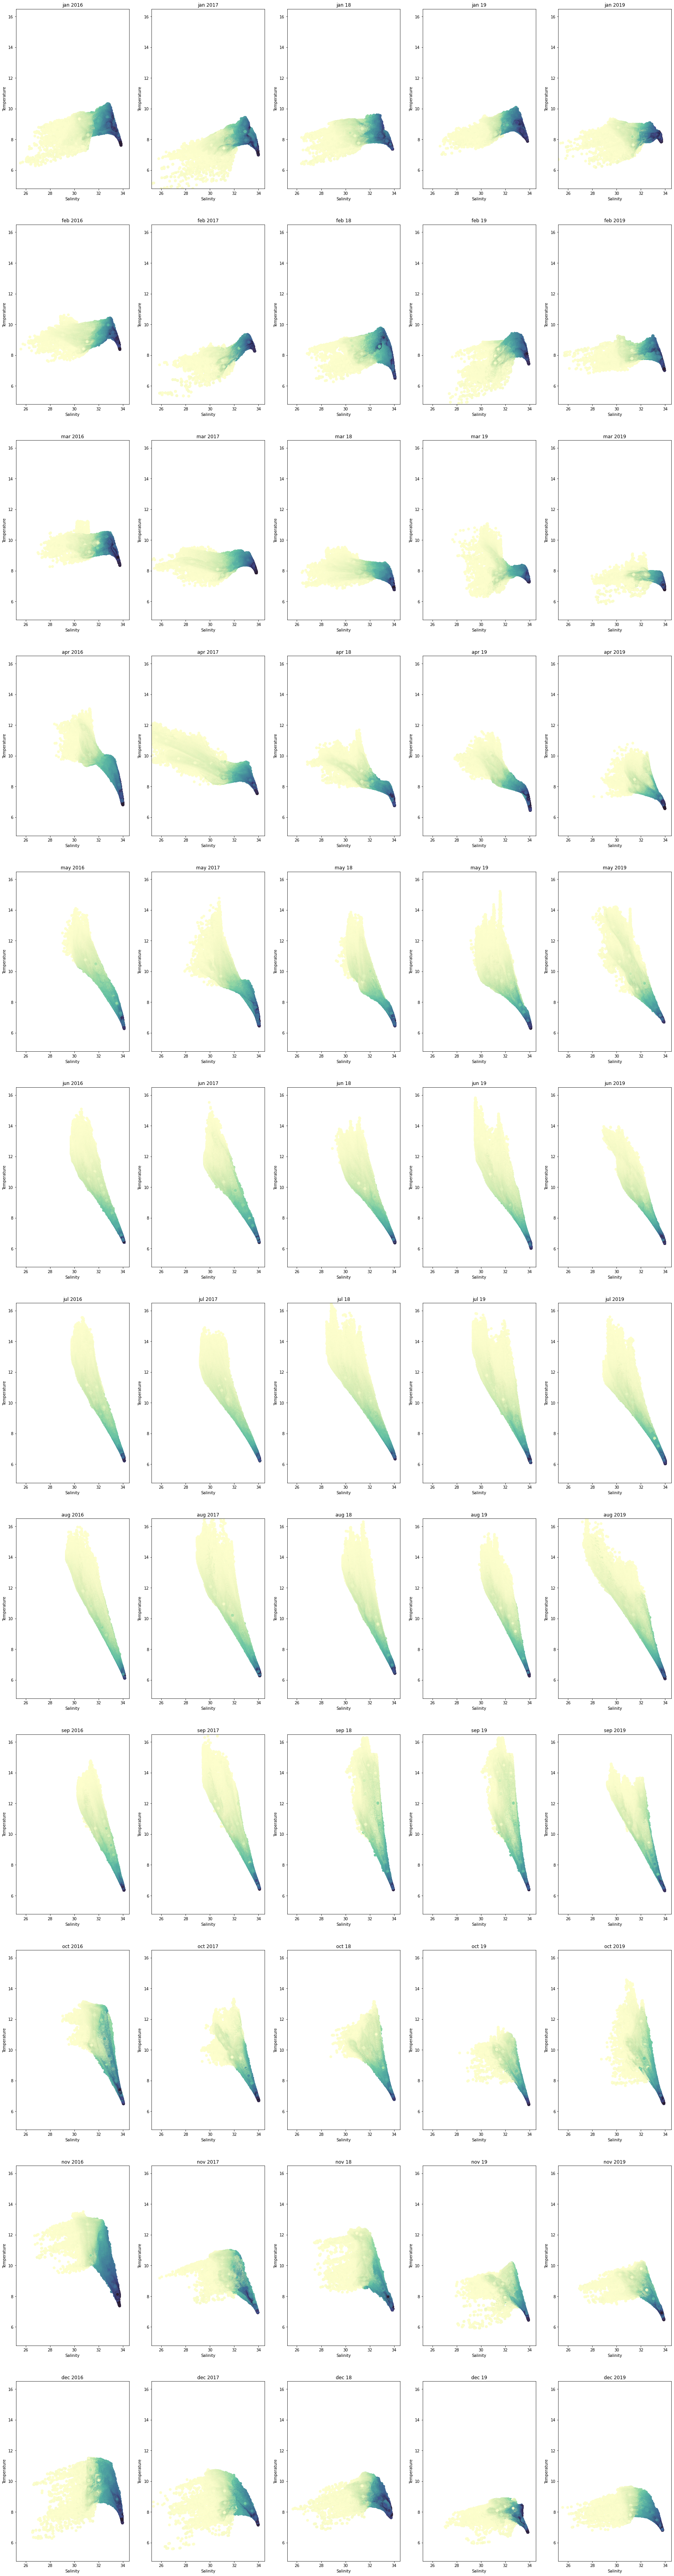

In [5]:
fig, ax = plt.subplots(12,5, figsize=(30,120))

yearjumps = [0,1,-2,1,0,1,0,1,1,0,1,0]
str_mo = ['jan', 'feb', 'mar', 'apr','may', 'jun', 'jul', 'aug', 'sep','oct', 'nov', 'dec']
starttime = 1
endtime = 720

#2016 and 2017
year = [16,17]

l = -1
for num in year:
    file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/1yr_runs/201905_1hr/forward_01jan'+str(num)+'/ariane_positions_quantitative.nc'
    mydata = xr.open_dataset(file)
    k=0
    l+=1
    for i in range(12):
        salt, temp, depth = get_data(mydata, starttime+(i*720+(sum(yearjumps[:i+1]*24))), endtime+(i*720+(sum(yearjumps[:i+1]*24))))
        
        #would like to get the denisty of points
        data , x_e, y_e = np.histogram2d(salt,temp, bins = 20, density = True )
        z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ), data ,np.vstack([salt,temp]).T ,method = "splinef2d", bounds_error = False)
        z[np.where(np.isnan(z))] = 0.0

        # Sort the points by density, so that the densest points are plotted last
        idx = z.argsort()
        salt, temp, depth = salt[idx], temp[idx], depth[idx]
                    
        ax[k,l].scatter(salt,temp, c=depth, cmap=cm.cm.deep)
        title = str_mo[i] + " 20" + str(num)
        ax[k,l].set_title(title)
        ax[k,l].set_ylabel('Temperature')
        ax[k,l].set_xlabel('Salinity')
        ax[k,l].set_ylim([4.8, 16.5])
        ax[k,l].set_xlim([25.2, 34.5])
        k+=1

#2019 and 2018 (both done month by month)
year = [18,19]
l=1
k=0
for num in year:
    l+=1
    k=0
    for i in range(len(str_mo)):
        file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_1hr/forward_01'+str_mo[i]+str(num)+'/ariane_positions_quantitative.nc'
        mydata = xr.open_dataset(file)
        
        salt = mydata.init_salt
        temp = mydata.init_temp
        depth = depthf(mydata.init_z-1.)[0]
        
        data , x_e, y_e = np.histogram2d(salt,temp, bins = 20, density = True )
        z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ), data ,np.vstack([salt,temp]).T ,method = "splinef2d", bounds_error = False)
        z[np.where(np.isnan(z))] = 0.0
        idx = z.argsort()
        salt, temp, depth = salt[idx], temp[idx], depth[idx]
        
        ax[k,l].scatter(salt,temp, c=depth, cmap=cm.cm.deep)
        title = str_mo[i] + " " + str(num)
        ax[k,l].set_title(title)
        ax[k,l].set_ylabel('Temperature')
        ax[k,l].set_xlabel('Salinity')
        ax[k,l].set_ylim([4.8, 16.5])
        ax[k,l].set_xlim([25.2, 34.5])
        k+=1
            

#2020
file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/1yr_runs/201905_1hr/forward_01jan20/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)

l=4
k=0
for i in range(12):
        salt, temp, depth = get_data(mydata, starttime+(i*720+(sum(yearjumps[:i+1]*24))), endtime+(i*720+(sum(yearjumps[:i+1]*24))))
        
        data , x_e, y_e = np.histogram2d(salt,temp, bins = 20, density = True )
        z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ), data ,np.vstack([salt,temp]).T ,method = "splinef2d", bounds_error = False)
        z[np.where(np.isnan(z))] = 0.0

        idx = z.argsort()
        salt, temp, depth = salt[idx], temp[idx], depth[idx]
                    
        ax[k,l].scatter(salt,temp, c=depth, cmap=cm.cm.deep)
        title = str_mo[i] + " 20" + str(num)
        ax[k,l].set_title(title)
        ax[k,l].set_ylabel('Temperature')
        ax[k,l].set_xlabel('Salinity')
        ax[k,l].set_ylim([4.8, 16.5])
        ax[k,l].set_xlim([25.2, 34.5])
        k+=1